In [1]:
import pandas as pd
import numpy as np


In [2]:
csv_path = r'/Users/mengxianze/TYUT/analyse/太理校集B(1).csv'

In [3]:
df = pd.read_csv(csv_path)
# 每一列的数据类型和示例数据
df.head()


,localId,TalkerId,Type,SubType,IsSender,CreateTime,Status,StrContent,StrTime,Remark,NickName,Sender
0,90530,63,10000,0,0,1676283859,NaN,"""商务合作@赞噢集市、进群请看群公告@赞噢集市、👉@赞噢集市""为企业微信用户，<_wc_cu...",2023-02-13 18:24:19,NaN,NaN,NaN
1,90531,63,10000,0,0,1676283867,NaN,"""士多啤梨""邀请你加入了群聊，群聊参与人还有：商务合作@赞噢集市、👉@赞噢集市、进群请看公告...",2023-02-13 18:24:27,NaN,NaN,NaN
2,90535,63,1,0,0,1676283954,NaN,食堂有没有卖临汾牛肉丸子面的\nhttps://c.zanao.com/l/1ONXF1\n...,2023-02-13 18:25:54,👉@,👉,25984982968481657@openim
3,90546,63,1,0,0,1676284920,NaN,出一根线\nhttps://c.zanao.com/l/1ONYGc\n\n快递可以放一两天...,2023-02-13 18:42:00,👉@,👉,25984982968481657@openim
4,90549,63,1,0,0,1676286020,NaN,18号晚十点武宿到迎西一人\nhttps://c.zanao.com/l/1ONZgC\n\...,2023-02-13 19:00:20,👉@,👉,25984982968481657@openim


In [4]:
demand_df = df[['StrContent', 'StrTime']]

In [5]:
demand_df.head()

,StrContent,StrTime
0,"""商务合作@赞噢集市、进群请看群公告@赞噢集市、👉@赞噢集市""为企业微信用户，<_wc_cu...",2023-02-13 18:24:19
1,"""士多啤梨""邀请你加入了群聊，群聊参与人还有：商务合作@赞噢集市、👉@赞噢集市、进群请看公告...",2023-02-13 18:24:27
2,食堂有没有卖临汾牛肉丸子面的\nhttps://c.zanao.com/l/1ONXF1\n...,2023-02-13 18:25:54
3,出一根线\nhttps://c.zanao.com/l/1ONYGc\n\n快递可以放一两天...,2023-02-13 18:42:00
4,18号晚十点武宿到迎西一人\nhttps://c.zanao.com/l/1ONZgC\n\...,2023-02-13 19:00:20


In [6]:
# 移除前两行,并且重新编号
demand_df = demand_df.iloc[2:]
demand_df.reset_index(drop=True, inplace=True)


In [7]:
print(demand_df.head())
print(demand_df.count())

                                          StrContent              StrTime
0  食堂有没有卖临汾牛肉丸子面的\nhttps://c.zanao.com/l/1ONXF1\n...  2023-02-13 18:25:54
1  出一根线\nhttps://c.zanao.com/l/1ONYGc\n\n快递可以放一两天...  2023-02-13 18:42:00
2  18号晚十点武宿到迎西一人\nhttps://c.zanao.com/l/1ONZgC\n\...  2023-02-13 19:00:20
3  明向电动车充电\nhttps://c.zanao.com/l/1OO0Mt\n\n求问文科计...  2023-02-13 19:32:30
4           靠背15出可小刀迎西\nhttps://c.zanao.com/l/1OO1lr  2023-02-13 19:47:39
StrContent    44129
StrTime       46132
dtype: int64


In [8]:

# 将 StrTime 列转换为 datetime 类型
demand_df['StrTime'] = pd.to_datetime(demand_df['StrTime'])

# 筛选 StrTime 在 2024-03-06 之后的所有行
filtered_df = demand_df[demand_df['StrTime'] > '2024-03-06 00:00:00']


In [9]:
filtered_df.reset_index(drop=True, inplace=True)

In [10]:
filtered_df.count()

StrContent    23365
StrTime       23389
dtype: int64

In [11]:
filtered_df = filtered_df.dropna(subset=['StrContent'])
filtered_df.reset_index(drop=True, inplace=True)

In [12]:
content = filtered_df.loc[1, 'StrContent']
time = filtered_df.loc[1, 'StrTime']

In [13]:
lines = content.split('\n')

In [14]:
lines

['难道这个世界上找一个不吃辣的男朋友很难吗',
 'https://c.zanoa.cn/l/1y1X7Ghv',
 '',
 '急收工程测量',
 'https://c.zanoa.cn/l/1y1X7EEa',
 '',
 '麻烦刚刚撞我那哥们加我一下车轮歪了',
 'https://c.zanoa.cn/l/1y1X7E1v',
 '',
 '有没有人在东餐捡到校**',
 'https://c.zanoa.cn/l/1y1X7EVR',
 '',
 '综测奖学金',
 'https://c.zanoa.cn/l/1y1X7Fuh',
 '',
 '明向出JAVA语言程序设计',
 'https://c.zanoa.cn/l/1y1X7EXu']

In [15]:
# 删除列表中含有'://'的元素
lines = [line for line in lines if '://' not in line and line != '']

In [16]:
lines

['难道这个世界上找一个不吃辣的男朋友很难吗',
 '急收工程测量',
 '麻烦刚刚撞我那哥们加我一下车轮歪了',
 '有没有人在东餐捡到校**',
 '综测奖学金',
 '明向出JAVA语言程序设计']

In [17]:
new_df = pd.DataFrame({'content': lines, 'time': time})

In [18]:
new_df.head()

,content,time
0,难道这个世界上找一个不吃辣的男朋友很难吗,2024-03-06 13:38:02
1,急收工程测量,2024-03-06 13:38:02
2,麻烦刚刚撞我那哥们加我一下车轮歪了,2024-03-06 13:38:02
3,有没有人在东餐捡到校**,2024-03-06 13:38:02
4,综测奖学金,2024-03-06 13:38:02


In [19]:
# 初始化一个空列表来存储内容和时间
new_data = []

# 遍历 filtered_df 的每一行
for index, row in filtered_df.iterrows():
    content = row['StrContent']
    time = row['StrTime']
    
    # 根据换行符切分内容
    lines = content.split('\n')
    
    # 过滤掉含有 '://' 的元素和空字符串
    lines = [line for line in lines if '://' not in line and line.strip()]
    
    # 将每一行的内容和时间添加到 new_data 列表中
    for line in lines:
        new_data.append({'content': line, 'time': time})

# 创建 DataFrame
new_df = pd.DataFrame(new_data)

In [20]:
new_df.head(20)

,content,time
0,软件大三上课本40r,2024-03-06 11:27:09
1,体测请假,2024-03-06 11:27:09
2,校医院能用医保吗,2024-03-06 11:27:09
3,入党问题,2024-03-06 11:27:09
4,网络安全工程转专业,2024-03-06 11:27:09
5,明向宿舍功率,2024-03-06 11:27:09
6,三创赛材料提交截止时间,2024-03-06 11:27:09
7,迎西出23毛概几乎全新,2024-03-06 11:27:09
8,65人专业综测排第十,2024-03-06 11:27:09
9,难道这个世界上找一个不吃辣的男朋友很难吗,2024-03-06 13:38:02


In [21]:
new_df.count()

content    167215
time       167215
dtype: int64

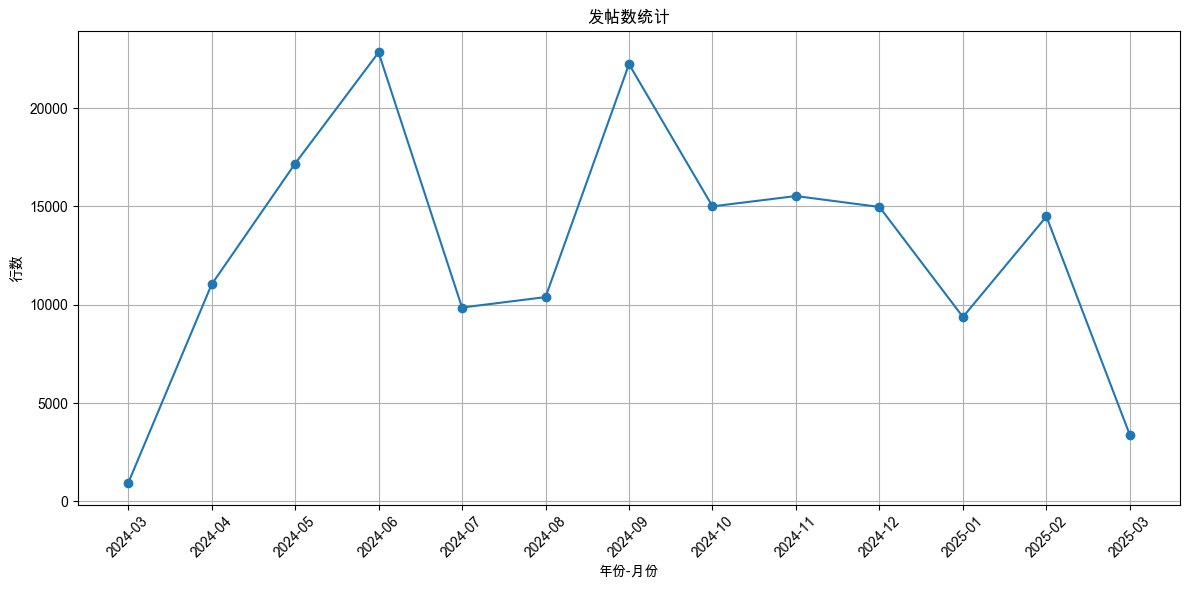

In [25]:
import matplotlib.pyplot as plt
import matplotlib

# 设置中文字体
matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 或者使用其他支持中文的字体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 确保 StrTime 列是 datetime 类型
new_df['time'] = pd.to_datetime(new_df['time'])

# 提取年份和月份
new_df['year_month'] = new_df['time'].dt.to_period('M')

# 按年份和月份分组并计数
monthly_counts = new_df.groupby('year_month').size().reset_index(name='count')

# 将 year_month 转换为字符串以便于绘图
monthly_counts['year_month'] = monthly_counts['year_month'].astype(str)

# 绘制折线图
plt.figure(figsize=(12, 6))
plt.plot(monthly_counts['year_month'], monthly_counts['count'], marker='o')
plt.title('发帖数统计')
plt.xlabel('年份-月份')
plt.ylabel('行数')
plt.xticks(rotation=45)  # 旋转 x 轴标签以便于阅读
plt.grid()
plt.tight_layout()  # 自动调整布局
plt.show()